In [92]:
import matplotlib.pyplot as plt
import numpy as np
import colorsys

def calc_differences(filepath):
    # Step 1: Load and parse the JSON file
    with open(filepath) as file:
        data = json.load(file)

    # Step 2: Filter the data to include only four-digit years
    # Include only years from min_year on
    filtered_data = [entry for entry in data if len(entry['name']) == 4]

    # Step 4: Extract temperature series data
    temp_series = {}
    for entry in filtered_data:
        cur = []
        for i, temp in enumerate(entry['data']):
            # ignore null values (null place holders at the end of the data for non-leap years)
            if temp:
                cur.append(temp)
        temp_series[int(entry['name'])] = cur
    
    start_year = None
    diff_1 = {}
    # First order differences
    for year in temp_series:
        # line up data so differences show up on end day
        cur_diff = []
        if start_year is None:
            start_year = year
        if year > start_year:
            cur_diff.append(temp_series[year][0] - temp_series[year-1][-1])
        else:
            cur_diff.append(0)
        for i in range(1, len(temp_series[year])):
            cur_diff.append(temp_series[year][i] - temp_series[year][i-1])
        diff_1[year] = cur_diff

    diff_2 = {}
    # Second order differences
    for year in diff_1:
        cur_diff = []
        # line up data so differences show up on end day
        if year > start_year:
            cur_diff.append(diff_1[year][0] - diff_1[year-1][-1])
        else:
            cur_diff.append(0)
        for i in range(1, len(diff_1[year])):
            cur_diff.append(diff_1[year][i] - diff_1[year][i-1])
        diff_2[year] = cur_diff

    diff_3 = {}
    # Third order differences
    for year in diff_2:
        cur_diff = []
        # line up data so differences show up on end day
        if year > start_year:
            cur_diff.append(diff_2[year][0] - diff_2[year-1][-1])
        else:
            cur_diff.append(0)
        for i in range(1, len(diff_2[year])):
            cur_diff.append(diff_2[year][i] - diff_2[year][i-1])
        diff_3[year] = cur_diff

    return [diff_1, diff_2, diff_3]

def graph_differences(filepath, rise_threshold):
    fig4, ad1 = plt.subplots(figsize=(10, 6))
    fig5, ad2 = plt.subplots(figsize=(10, 6))
    fig6, ad3 = plt.subplots(figsize=(10, 6))
    [diff_1, diff_2, diff_3] = calc_differences(filepath)
    
    # Step 6: Create graphs
    
    
    # Create a custom colormap with varying saturation levels
    num_years = len(diff_1)

    # Define the saturation levels
    saturation_levels = np.linspace(0, 1, num_years)
    # Set the hue (color) and lightness (brightness) to fixed values (blue and 0.7, respectively)
    hue = 0.6  # Blue color
    lightness = 0.7  # Brightness
    alpha = 0.1
    # Create a list of colors with varying saturation levels and opacity using the HSL color model
    colors = [(*colorsys.hls_to_rgb(hue, lightness, saturation), alpha) for saturation in saturation_levels]
    
    # Change color of most recent year
    hue = 0.0
    alpha = 0.7
    colors[-1] = [*colorsys.hls_to_rgb(hue, lightness, 1.0), alpha]
    
    # Graph the difference graphs
    
    y = diff_1
    # Plotting the data
    # Plotting the data with different colors for each year
    for i, (year, values) in enumerate(diff_1.items()):
        color = colors[i]
        x = range(1, len(values) + 1)
        ad1.plot(x, values, label=str(year), color=color)
    # Add horizontal line for current rise threshold
    ad1.axhline(y=rise_threshold, linestyle='dashed', color='purple')
    # Add labels and legend
    ad1.set_xlabel('Day of the Year')
    ad1.set_ylabel('1st order differences (Δ C day over day)')
    ad1.set_title('First Order Differences for Global Mean Daily Temperatures (C)')
    ad1.legend(loc='upper right', bbox_to_anchor=(1.5, 1), ncol=3)
    
    y = diff_2
    # Plotting the data
    # Plotting the data with different colors for each year
    for i, (year, values) in enumerate(diff_2.items()):
        color = colors[i]
        x = range(1, len(values) + 1)
        ad2.plot(x, values, label=str(year), color=color)
    # Add labels and legend
    ad2.set_xlabel('Day of the Year')
    ad2.set_ylabel('2nd order differences (Acceleration)')
    ad2.set_title('Second Order Differences for Global Mean Daily Temperatures (C)')
    ad2.legend(loc='upper right', bbox_to_anchor=(1.5, 1), ncol=3)

    y = diff_3
    # Plotting the data
    # Plotting the data with different colors for each year
    for i, (year, values) in enumerate(diff_3.items()):
        color = colors[i]
        x = range(1, len(values) + 1)
        ad3.plot(x, values, label=str(year), color=color)
    # Add labels and legend
    ad3.set_xlabel('Day of the Year')
    ad3.set_ylabel('3rd order differences (Jerks)')
    ad3.set_title('Third Order Differences for Global Mean Daily Temperatures (C)')
    ad3.legend(loc='upper right', bbox_to_anchor=(1.5, 1), ncol=3)
    
    plt.show()

In [20]:
#### CONFIG FOR MAIN PARAMETERS
# current year want to extrapolate data for that already have partial data
extrapolate_year = 2023
# file path to local copy of json wih temp data
# from https://climatereanalyzer.org/clim/t2_daily/json/cfsr_world_t2_day.json
filepath = 'cfsr_world_t2_day.json'

Creating graphs, please wait...


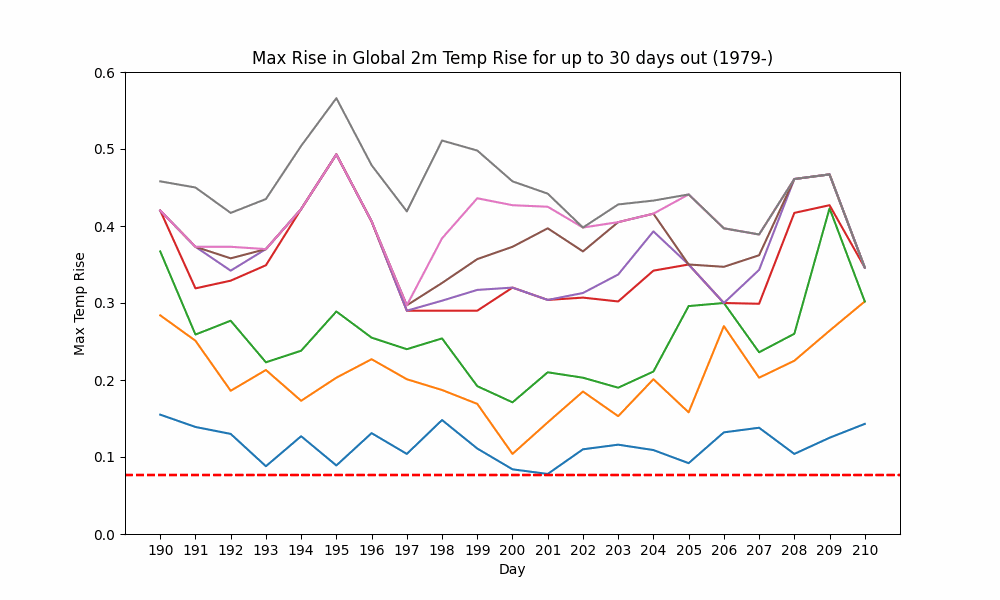

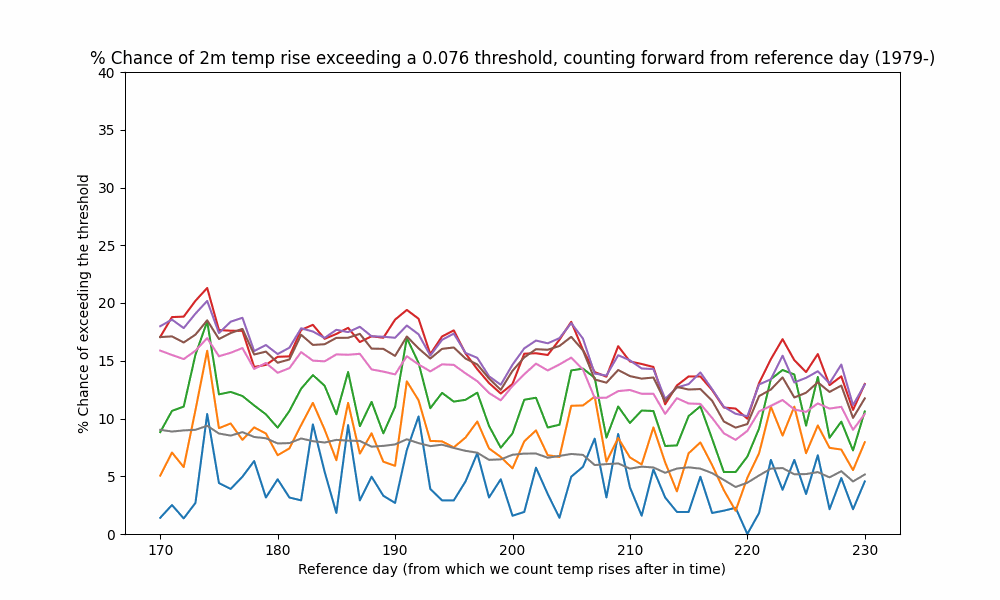

In [22]:
# start of day of year to project out from (last day of observed data: July 19, 2023 = 200)
start_day_1_index = 200
# threshold in rise to count occurences for (the record temperature - the most recent observation temperature)
rise_threshold = 17.233 - 17.157
# days out from last day of observed data to do counts for (13 + July 18 = July 31)
days_out = [1, 2, 3, 7, 10, 12, 14, 30]
#days_out = [1, 2, 3, 7, 22, 30]

# the temp variability changes throughout the year
# include probabilities for days prior/after reference day
include_days_plus_minus = 30

# the year for extrapolation
extrapolate_year = 2023

# zoom on max rise days: how many days +- to zoom in on start_day_1_index
# set to 0 for full year
zoom_max_rise_days = 10

# exclude data from before min_year (for era statistics and sensitivity analysis)
# set to 0 for all years (or a year like 2016 to exclude years before 2016)
min_year = 0
# create graph animations over range of min_year (only final graph animation, and no occurences graph or text-based stats)
sensitivity_analysis = True

# main code
frames_fig1 = []
frames_fig3 = []
if sensitivity_analysis:
    print('Creating graphs, please wait...')
    for min_year in range(1979, 2023):
        [framename_fig1, framename_fig3] = graph_max_rise_plus_days(filepath, extrapolate_year, days_out, start_day_1_index, rise_threshold, include_days_plus_minus, zoom_max_rise_days, min_year, sensitivity_analysis)
        frames_fig1.append(iio.v3.imread(framename_fig1))
        frames_fig3.append(iio.v3.imread(framename_fig3))
    iio.mimsave("sensitivity_analysis_max_rise.gif", frames_fig1, duration=500, loop=0)
    iio.mimsave("sensitivity_analysis_prob.gif", frames_fig3, duration=500, loop=0)
    # Display the animated gif
    display(Image(filename="sensitivity_analysis_max_rise.gif"))
    display(Image(filename="sensitivity_analysis_prob.gif"))
else:
    [framename1, framename3] = graph_max_rise_plus_days(filepath, extrapolate_year, days_out, start_day_1_index, rise_threshold, include_days_plus_minus, zoom_max_rise_days, min_year, sensitivity_analysis)


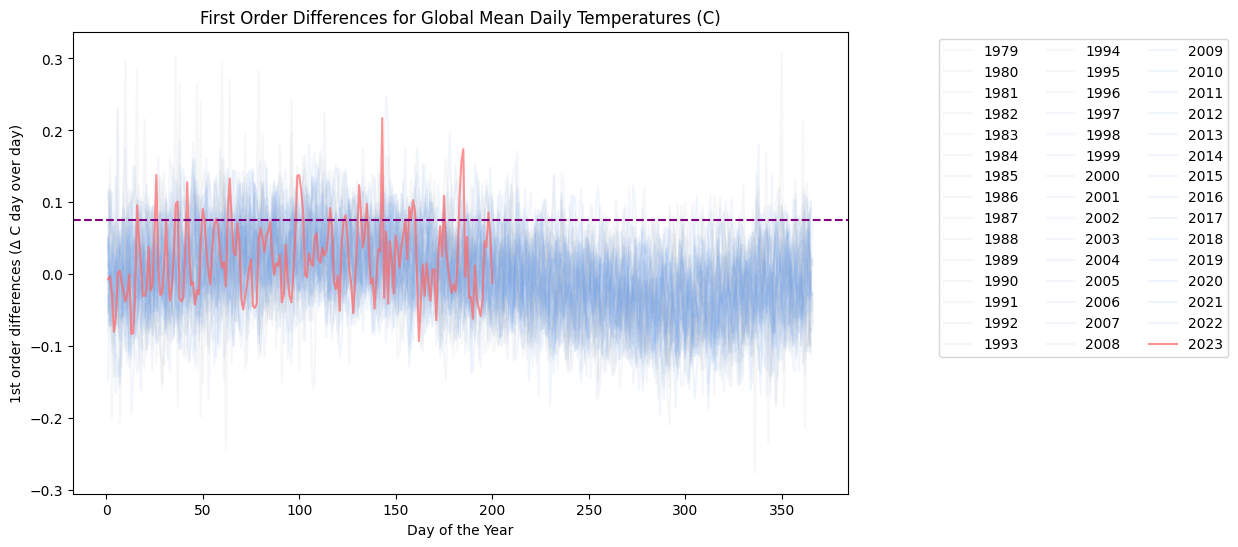

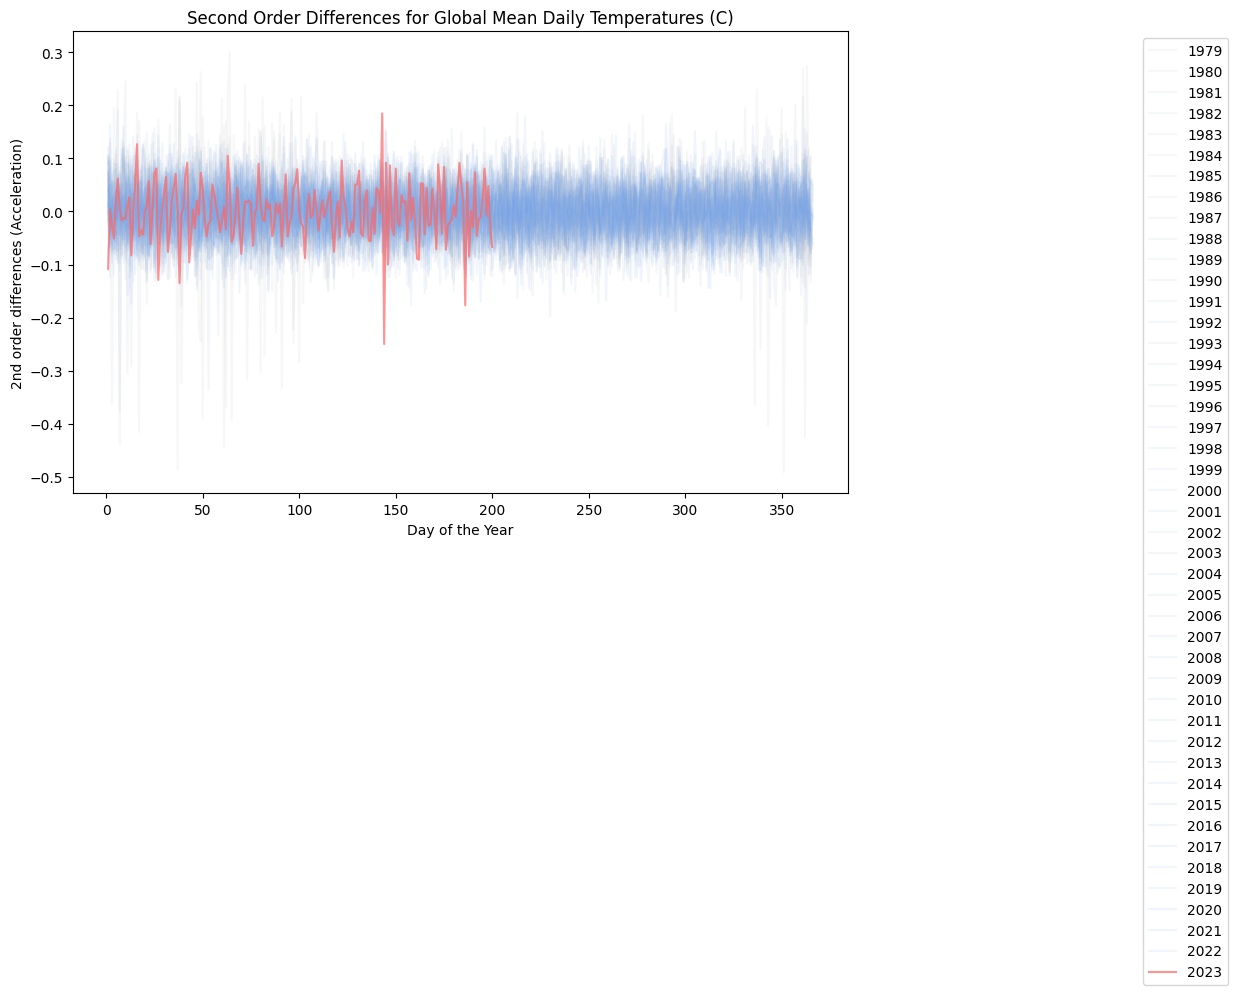

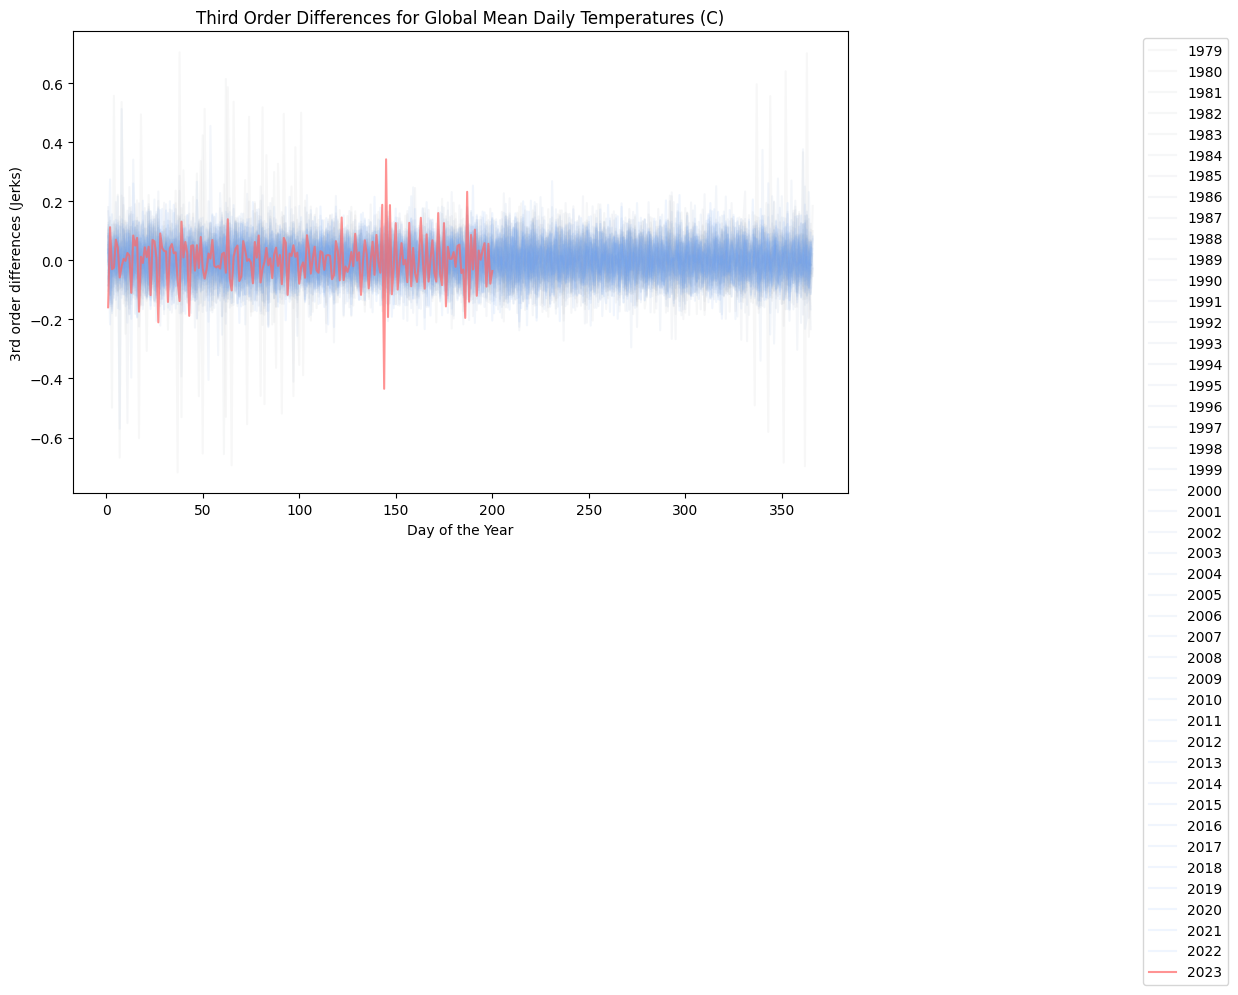

In [93]:
graph_differences(filepath, rise_threshold)